# [Introduction to Data Science](http://datascience-intro.github.io/1MS041-2025/)    
## 1MS041, 2025 
&copy;2025 Raazesh Sainudiin, Benny Avelin. [Attribution 4.0 International     (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)

## Concentration and limits

Let us begin our story with the Long Term Relative Frequency idea, and consider an i.i.d. sequence of random variables $X_1,\ldots,X_n$ each being Bernoulli($1/2$).

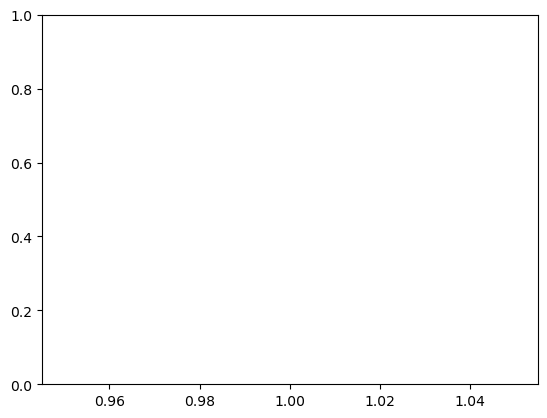

interactive(children=(IntSlider(value=1, description='Samples', max=500, min=1, step=10), IntSlider(value=1, d…

In [3]:
from ipywidgets import interact, IntSlider
from Utils import discrete_histogram
import numpy as np
@interact 
def concentration(n=IntSlider(1,1,500,10,description="Samples"),m=IntSlider(1,1,10,1,description="Trials")):
    import matplotlib.pyplot as plt
    np.random.seed(0)
    # The following code is written in this cumbersome way to make sure that the 
    # random number generator is seeded in a way that is compatible with the
    # idea that the previous trials remain the same when adding the next trial.
    # This is important for the visualization.
    X = np.concatenate([np.random.randint(0,2,size=(n,1)) for i in range(m)],axis=1)
    means = np.cumsum(X,axis=0)/np.arange(1,n+1)[:,None]
    plt.plot(np.arange(1,n+1),means,alpha=1/np.sqrt(m))
    plt.ylim(0,1)

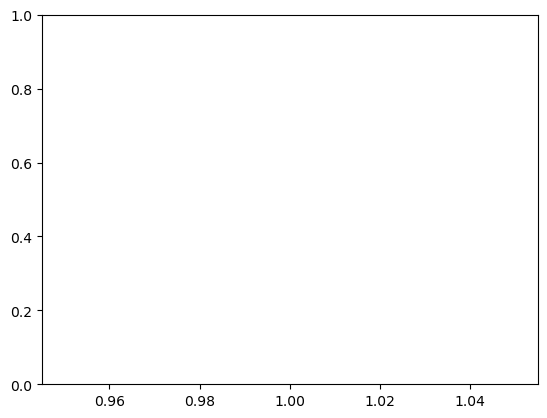

interactive(children=(IntSlider(value=1, description='Samples', max=5000, min=1, step=100), IntSlider(value=1,…

In [4]:
from ipywidgets import interact, IntSlider
from Utils import discrete_histogram
import numpy as np
@interact 
def concentration(n=IntSlider(1,1,5000,100,description="Samples"),m=IntSlider(1,1,1000,100,description="Trials")):
    import matplotlib.pyplot as plt
    np.random.seed(0)
    # The following is not stable w.r.t. trials, but works for larger m
    X = np.random.randint(0,2,size=(n,m))
    means = np.cumsum(X,axis=0)/np.arange(1,n+1)[:,None]
    plt.plot(np.arange(1,n+1),means,alpha=1/np.sqrt(m))
    plt.ylim(0,1)

Consider an i.i.d. sequence of random variables $X_1,\ldots,X_n$ each being Bernoulli($1/2$). Then the concept of concentration is telling us that

$$
    P\left ( \left | \frac{1}{n} \sum_{i=1}^n X_i - \mathbb{E}(X_i) \right | > \epsilon \right )
$$

gets smaller as $n$ gets larger. For instance, using Chebychevs inequality we get

$$
    P\left ( \left | \frac{1}{n} \sum_{i=1}^n X_i - \mathbb{E}(X_i) \right | > \epsilon \right ) \leq \frac{\mathbb{V}\left( \frac{1}{n} \sum_{i=1}^n X_i \right )}{\epsilon^2} = \frac{\mathbb{V}\left( X_0 \right )}{\epsilon^2 n}
$$

We can see that this is at least true in the simulation below

P(mean > mu + 0.3 ) = 0.50860 <= Chebychev 11.11111


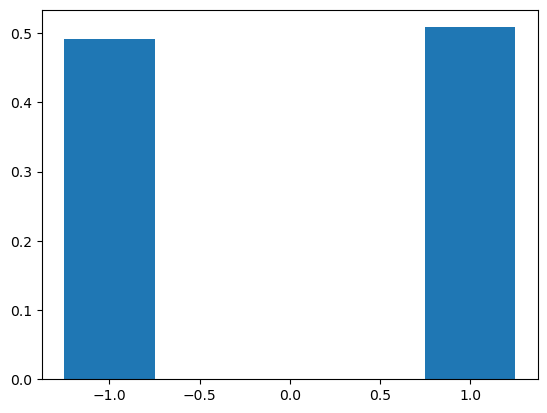

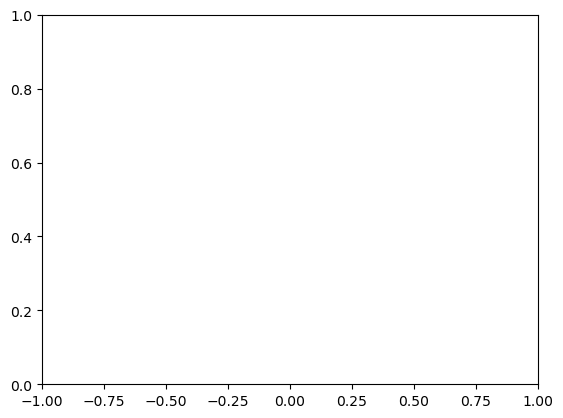

interactive(children=(IntSlider(value=1, description='n', max=50, min=1, step=5), Output()), _dom_classes=('wi…

In [5]:
from ipywidgets import interact, IntSlider
from Utils import discrete_histogram
import numpy as np
@interact 
def concentration(n=IntSlider(1,1,50,5)):
    import matplotlib.pyplot as plt
    X = np.random.randint(0,2,size=(n,10000))*2-1
    means = np.mean(X,axis=0)
    print("P(mean > mu + 0.3 ) = %.5f <= Chebychev %.5f" % (np.mean(means > 0.3),1/(0.3**2*n)))
    discrete_histogram(means,normed=True)
    plt.xlim(-1,1)

Hoeffdings inequality on the other hand is sharper and gives a bound much smaller, namely that

$$
    P\left ( \left |\frac{1}{n} \sum_{i=1}^n X_i - \mathbb{E}(X_i) \right | > \epsilon \right ) 
    \leq 2e^{-2n \epsilon^2}
$$

P(mean > mu + 0.3 ) = 0.49790 <= Hoeffding 0.83527


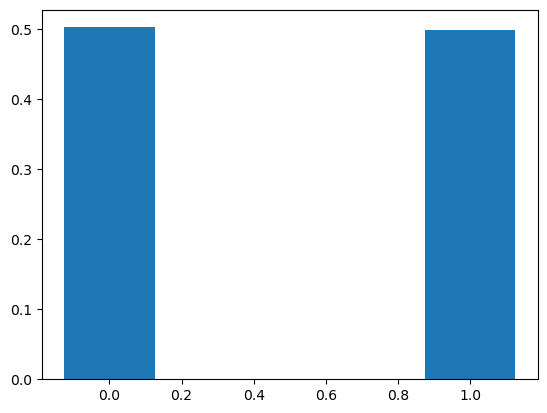

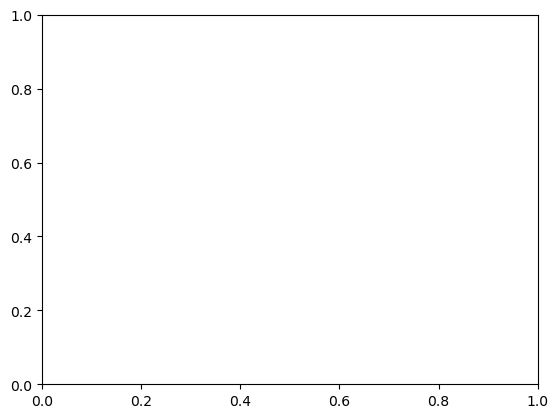

interactive(children=(IntSlider(value=1, description='n', max=50, min=1, step=5), Output()), _dom_classes=('wi…

In [6]:
@interact 
def concentration(n=IntSlider(1,1,50,5)):
    import matplotlib.pyplot as plt
    X = np.random.randint(0,2,size=(n,10000))
    means = np.mean(X,axis=0)
    print("P(mean > mu + 0.3 ) = %.5f <= Hoeffding %.5f" % (np.mean(means > 0.5+0.3),np.exp(-2*n*0.3**2)))
    discrete_histogram(means,normed=True)
    plt.xlim(0,1)

This is much closer, and in fact very close.

### Using concentration as a measure of confidence

We can use concentration as a measure of confidence in the following way. Consider $X_1,\ldots, X_n$ being i.i.d. sequence of Bernoulli($p$) for some unknown $p$. From the concept of concentration, we would expect that if we have many observations ($n$ large) we could use the empirical mean of the observations as a guess, but note that there is some variability as we saw in the above simulations. So what do we do? We use the concentration inequality to get information how far we can deviate from $p$ in the following way

$$
    P(\bar X_n - \mathbb{E}(\bar X_n) \geq \epsilon) \leq e^{-2n\epsilon^2}
$$

Since $\mathbb{E}(\bar X_n) = p$, rearrange and get

$$
    P(p \leq \bar X_n - \epsilon) \leq e^{-2n\epsilon^2}
$$

The complementary event thus satisfies

$$
    P(\bar X_n - \epsilon < p) \geq 1-e^{-2n\epsilon^2}
$$

We can do the same for the other side (see lecture notes) and we get

$$
    P(\bar X_n - \epsilon < p < \bar X_n + \epsilon) \geq 1-2 e^{-2n\epsilon^2}.
$$

If you where now asked to estimate $p$ using $n$ observations and give an interval where you with at least 95% confidence can say contains $p$, then you need to choose $\epsilon > 0$ such that

$$
    1-2 e^{-2n\epsilon^2} \geq 0.95.
$$

Smaller $\epsilon$ gives smaller intervals, so lets choose to have the smallest possible $\epsilon$ while still obaying the inequality above, i.e. we choose $\epsilon$ to solve

$$
    1-2 e^{-2n\epsilon^2} = 0.95.
$$

Rearranging we and taking log and then square root we obtain

$$
    \epsilon = \sqrt{-\frac{1}{2n}\ln\left(\frac{1-0.95}{2}\right)}
$$

In [7]:
from ipywidgets import FloatSlider
@interact 
def concentration(n=IntSlider(value=1,min=50,max=500,step=50),p=FloatSlider(value=0.5, min=0,max=1,step=0.1)):
    X = np.random.binomial(1,p,size=(n))
    means = np.mean(X,axis=0)
    epsilon = np.sqrt(-1/(2*n)*np.log((1-0.95)/2))
    print("95%% confidence interval [%.2f, %.2f] for p=%.2f n=%d" % (means-epsilon,means+epsilon,p,n))

95% confidence interval [0.29, 0.67] for p=0.50 n=50


interactive(children=(IntSlider(value=50, description='n', max=500, min=50, step=50), FloatSlider(value=0.5, d…

In [8]:
from ipywidgets import FloatSlider
@interact 
def concentration_300(n=IntSlider(value=1,min=50,max=5000,step=50)):
    X = np.minimum(np.abs(70+6*np.random.normal(size=(n))),300)
    means = np.mean(X,axis=0)
    epsilon = np.sqrt(-1/(2*n/(300**2))*np.log((1-0.95)/2))
    print("95%% confidence interval [%.2f, %.2f] for n=%d" % (means-epsilon,means+epsilon,n))

95% confidence interval [11.86, 127.09] for n=50


interactive(children=(IntSlider(value=50, description='n', max=5000, min=50, step=50), Output()), _dom_classes…

These things are super useful. Lets go back to our sms spam/ham problem and see what we can say there

In [ ]:
from Utils import load_sms 
sms_data = load_sms()
sms_data[:2]

In [ ]:
interesting_words=set(['free','prize'])
TF10 = {True: 1, False: 0}
Z_obs = [TF10[not interesting_words.isdisjoint([word.lower() for word in line[0].split(' ')])] for line in sms_data]
Y_obs = [y for x,y in sms_data]

Recall that we computed the mean of Y_obs, which is the mean spam number. This is a Bernoulli random variable with unknown $p$, so we can use our methods above to compute a confidence interval

In [ ]:
def epsilon_bernoulli(n,alpha):
    return np.sqrt(-1/(2*n)*np.log((alpha)/2))

In [ ]:
epsilon = epsilon_bernoulli(len(Y_obs),0.05)
mean_Y_obs = np.mean(Y_obs)
print("[%.3f,%.3f]" % (mean_Y_obs-epsilon,mean_Y_obs+epsilon))

From this we get that we have provided a prediction as to what is the true probability of getting a spam email.

Lets take a look at the conditional probability. Recall that

$$
    P(Y = 1 \mid Z = 1) = \frac{P(Y = 1 \text{ and } Z = 1)}{P(Z = 1)}
$$

but this requires you to estimate both things on the right, and give a region for both and finally figure out an interval for the ratio. But, there is an easier way, which sometimes works better. Namely, to look at the random variable $Y \mid (Z=1)$ which we do by filtering

In [ ]:
Y_mid_Z1 = [y for z,y in zip(Z_obs,Y_obs) if z == 1]

Now for this you have a certain number of observations and we can use this instead as follows

In [ ]:
epsilon = epsilon_bernoulli(len(Y_mid_Z1),0.05)
mean_Y_obs = np.mean(Y_mid_Z1)
print("[%.3f,%.3f]" % (mean_Y_obs-epsilon,mean_Y_obs+epsilon))

## Being clever with Bennetts inequality

In [29]:
def bennett_epsilon(n,b,sigma,alpha):
    import scipy.optimize as so
    h = lambda u: (1+u)*np.log(1+u)-u
    f = lambda epsilon: np.exp(-n*sigma**2/b**2*h(b*epsilon/sigma**2))-alpha/2
    ans = so.fsolve(f,0.002)
    epsilon = np.abs(ans[0])
    print("Numerical error", f(epsilon))
    return epsilon

In [ ]:
bennett_epsilon(50,300,20,0.05)

In [ ]:
from ipywidgets import FloatSlider
@interact 
def concentration_300(n=IntSlider(value=1,min=50,max=5000,step=50),sigma=FloatSlider(value=10, min=1,max=300,step=1)):
    X = np.minimum(np.abs(70+6*np.random.normal(size=(n))),300)
    means = np.mean(X,axis=0)
    epsilon = np.sqrt(-1/(2*n/(300**2))*np.log((1-0.95)/2))
    epsilon2 = bennett_epsilon(n,b=300,sigma=sigma,alpha=0.05)
    print("95%% confidence interval rough [%.2f, %.2f] for n=%d" % (means-epsilon,means+epsilon,n))
    print("95%% confidence interval Bennett [%.2f, %.2f] for n=%d" % (means-epsilon2,means+epsilon2,n))